## Last.fm

Exploring last.fm scrobble data

The data here is collected from the last.fm API using the `lastfm.py` script.

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("mwild.db")

data = pd.read_sql_query(
    """select strftime('%s', date, 'unixepoch', 'localtime') as date, artist, album, track
    from music_scrobbles 
    where date > 0
    order by date desc""",
    conn,
    index_col="date",
    parse_dates={"date": "s"})

data[:10]


,artist,album,track
date,,,
2019-12-16 13:45:23,植松伸夫,FINAL FANTASY X HD Remaster Original Soundtrack,Seymour’s Ambition
2019-12-16 13:43:09,仲野順也,FINAL FANTASY X HD Remaster Original Soundtrack,The Temple Players
2019-12-16 13:41:08,仲野順也,FINAL FANTASY X HD Remaster Original Soundtrack,The Void
2019-12-16 13:38:27,浜渦正志,FINAL FANTASY X HD Remaster Original Soundtrack,Macalania Woods
2019-12-16 13:35:46,植松伸夫,FINAL FANTASY X HD Remaster Original Soundtrack,Jecht’s Theme
2019-12-16 13:32:28,浜渦正志,FINAL FANTASY X HD Remaster Original Soundtrack,Thunder Plains
2019-12-16 10:44:52,植松伸夫,FINAL FANTASY X HD Remaster Original Soundtrack,Yuna’s Theme
2019-12-16 10:41:03,植松伸夫,FINAL FANTASY X HD Remaster Original Soundtrack,Braska’s Daughter
2019-12-16 10:37:01,仲野順也,FINAL FANTASY X HD Remaster Original Soundtrack,The Summoning


Count of Scrobbles per day, month, year

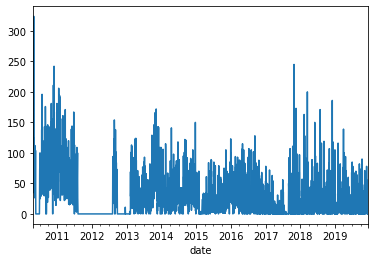

In [11]:
data.resample("D")["track"].count().plot()

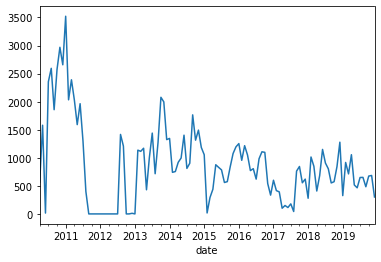

In [3]:
data.resample("M")["track"].count().plot()

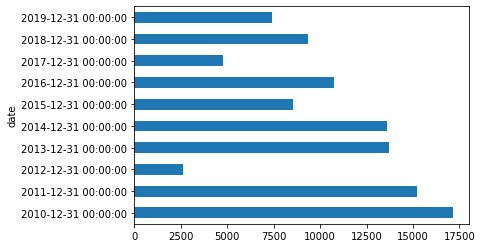

In [4]:
data.resample("Y")["track"].count().plot.barh()

### Github-style heatmap

From https://beepb00p.xyz/mypkg.html#lastfm

<module 'matplotlib.pyplot' from 'c:\\users\\wilds\\scoop\\apps\\python\\current\\lib\\site-packages\\matplotlib\\pyplot.py'>

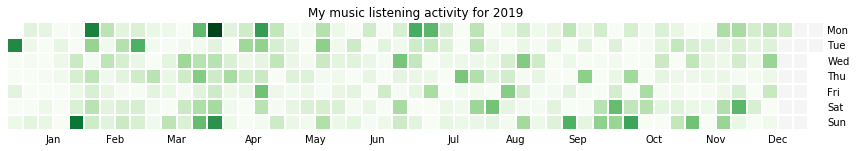

In [9]:
import calmap
import datetime

year = "2019"

plt.figure(figsize=(12, 3))

calmap.yearplot(data[year]["track"], how="count", cmap="Greens")
plt.tight_layout()
plt.title("My music listening activity for {}".format(year))
plt

# how to save:
#plot_file = 'lastfm_2018.png'
#plt.savefig(plot_file)
#plot_file